<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter15/Visual_Question_answering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import torch
from matplotlib import pyplot as plt
from transformers import AutoProcessor, Blip2ForConditionalGeneration
device = "cuda" if torch.cuda.is_available() else "cpu"

MODEL_ID = "Salesforce/blip2-opt-2.7b"
processor = AutoProcessor.from_pretrained(MODEL_ID)
model = Blip2ForConditionalGeneration.from_pretrained(MODEL_ID, torch_dtype=torch.float16)
_ = model.to(device)

In [2]:
import requests
from PIL import Image

image = Image.open('/content/Tejas.jpeg')

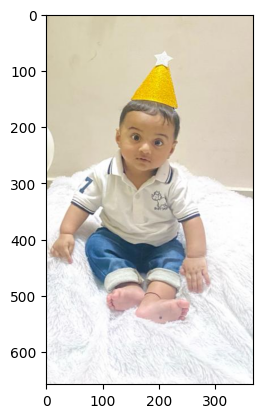

In [10]:
plt.imshow(image)
plt.show()

In [3]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)


generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


a baby wearing a party hat sits on a bed


In [7]:
prompt = "Question: what is the color of baby's trousers? Answer:"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=10)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

blue
